<a href="https://colab.research.google.com/github/yassine978/Prostate-Cancer-PSA_Level-Prediction/blob/main/Prostate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <font color="#3918c6" size="6">
    <b>Projet Apprentissage Statistique II : Prédiction du taux de PSA dans le cancer de la prostate</b>
  </font>
</center>

<font color="#3918c6" size="6">
  <h1><strong>Présentation du projet : Étapes, Résultats, Livrables et Outils</strong></h1>
  <p>
    <img src="https://img.shields.io/badge/Python-3.8+-blue.svg" alt="Python">
    <img src="https://img.shields.io/badge/Machine%20Learning-Régression-green" alt="Apprentissage automatique">
  </p>
  <p><em>Elaboré Par : Guesmi Chiheb - Lazghab Ramy - Madhi Mohamed Yassine - Znaidi Mehdi </em></p>
  <p><em>M1 IASD - Université Paris Dauphine PSL</em></p>
</font>

<hr>

<h2>Objectif</h2>
<p>Développer un modèle d’apprentissage automatique pour prédire le <strong>log du taux d’antigène spécifique de la prostate (lpsa)</strong>, un indicateur clé dans le cancer de la prostate, en se concentrant sur :</p>
<ul>
  <li><strong>Minimiser l’erreur de prédiction</strong> (ex : erreur quadratique moyenne, RMSE).</li>
  <li><strong>Maximiser le pouvoir explicatif</strong> (ex : score R²).</li>
  <li><strong>Interpréter la contribution des variables</strong> pour comprendre les facteurs influençant les niveaux de PSA.</li>
</ul>

<hr>

<h2>Étapes du projet</h2>

<h3>1. Description du jeu de données</h3>
<p><strong>Contexte</strong> :<br>
Le jeu de données concerne le cancer de la prostate, contenant des mesures cliniques de patients. L’objectif est de prédire la variable continue <code>lpsa</code> (log du taux d’antigène spécifique de la prostate) à partir de variables comme le volume tumoral, le poids de la prostate et le score de Gleason.
</p>

<p><strong>Exploration initiale</strong> :</p>
<ul>
  <li><strong>Variables</strong> : 8 variables (ex : <code>lcavol</code>, <code>lweight</code>, <code>age</code>, <code>lbph</code>, <code>svi</code>, <code>lcp</code>, <code>gleason</code>, <code>pgg45</code>), mélange de variables numériques et catégorielles.</li>
  <li><strong>Cible</strong> : <code>lpsa</code> (continue).</li>
  <li><strong>Taille</strong> : 97 échantillons, répartis en entraînement (67) et test (30) selon la colonne <code>train</code>.</li>
  <li><strong>Analyse statistique</strong> : Statistiques descriptives et analyse de corrélation réalisées.</li>
</ul>

<p><strong>Visualisations</strong> :</p>
<ul>
  <li><strong>Histogrammes</strong> : Affichent les distributions des variables (ex : <code>lcavol</code>, <code>age</code>) et de la cible (<code>lpsa</code>).</li>
  <li><strong>Carte de corrélation</strong> : Montre les relations entre variables, avec une forte corrélation positive entre <code>lcavol</code> et <code>lpsa</code> (0.73).</li>
  <li><strong>Nuages de points</strong> : Illustrent les relations entre les variables (ex : <code>lcavol</code>, <code>lweight</code>) et <code>lpsa</code>.</li>
  <li><strong>Boîtes à moustaches</strong> : Montrent les distributions de <code>lpsa</code> selon <code>svi</code> et <code>gleason</code>.</li>
</ul>

<!-- Le code Python peut rester en anglais ou être adapté selon les besoins pédagogiques -->

<hr>

<h3>2. Prétraitement des données</h3>
<ul>
  <li><strong>Valeurs manquantes</strong> : Aucune valeur manquante.</li>
  <li><strong>Sélection de variables</strong> : Utilisation des 8 variables citées.</li>
  <li><strong>Normalisation</strong> : Application de <code>StandardScaler</code> pour les modèles sensibles à l’échelle (ex : SVR, Ridge).</li>
  <li><strong>Séparation train-test</strong> : Basée sur la colonne <code>train</code>.</li>
</ul>

<hr>

<h3>3. Application d’algorithmes transparents</h3>
<p><strong>Modèles</strong> :</p>
<ul>
  <li><strong>Régression linéaire</strong> : Modèle de base pour capturer les relations linéaires.</li>
  <li><strong>Ridge, Lasso, ElasticNet</strong> : Régressions régularisées pour éviter le surapprentissage.</li>
</ul>

<p><strong>Analyse</strong> :</p>
<ul>
  <li><strong>Coefficients</strong> : <code>lcavol</code> (0.564), <code>lweight</code> (0.622), <code>svi</code> (0.762) sont significatifs (p < 0.05).</li>
  <li><strong>VIF (Facteur d’Inflation de la Variance)</strong> : Tous les VIF < 5 (ex : <code>lcp</code> VIF = 3.10).</li>
  <li><strong>Ridge</strong> : Réduction des coefficients, mais <code>lcavol</code> et <code>lweight</code> restent influents.</li>
</ul>

<hr>

<h3>4. Application d’algorithmes "boîte noire" et interprétation</h3>
<p><strong>Modèles</strong> :</p>
<ul>
  <li><strong>Random Forest Regressor</strong> : Modèle d’ensemble pour capturer les relations non linéaires.</li>
  <li><strong>Support Vector Regression (SVR)</strong> : Test de noyaux linéaires et non-linéaires pour des prédictions robustes.</li>
</ul>

<p><strong>Interprétation</strong> :</p>
<ul>
  <li><strong>SHAP</strong> : Utilisé pour expliquer les contributions des variables dans Random Forest et LinearSVR. <code>pgg45</code> et <code>age</code> sont les plus influentes dans SVR.</li>
  <li><strong>LIME</strong> : Explications locales pour des prédictions individuelles, mettant en avant <code>gleason</code> et <code>lcavol</code>.</li>
</ul>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR,LinearSVR
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_predict,RandomizedSearchCV,train_test_split
from scipy.stats import uniform, reciprocal
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
import shap
import lime
import lime.lime_tabular

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prostate.csv")
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/prostate.csv')
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 7.0 KB


In [ ]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


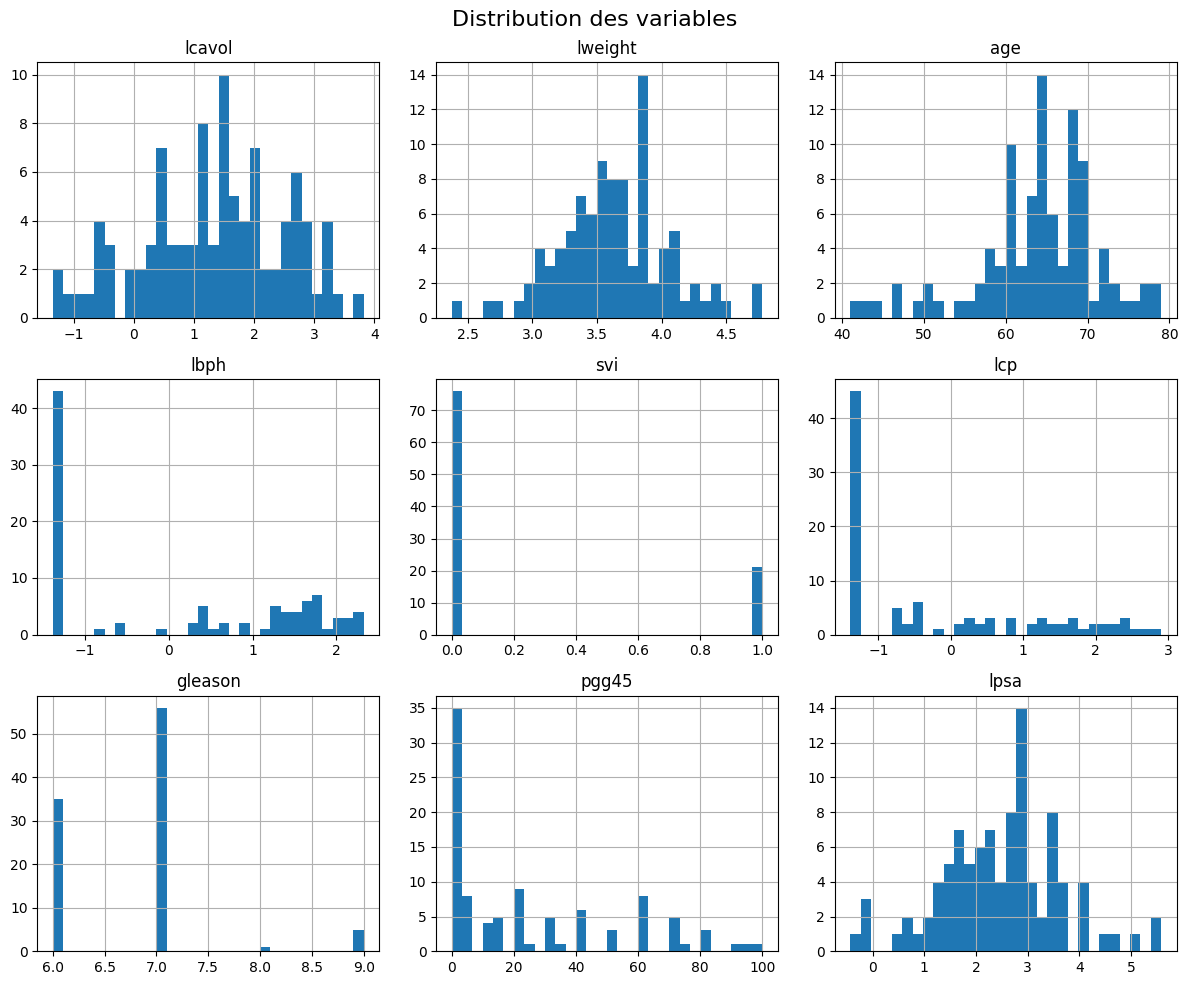

In [ ]:
df.hist(bins=30, figsize=(12, 10))
plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout()
plt.show()


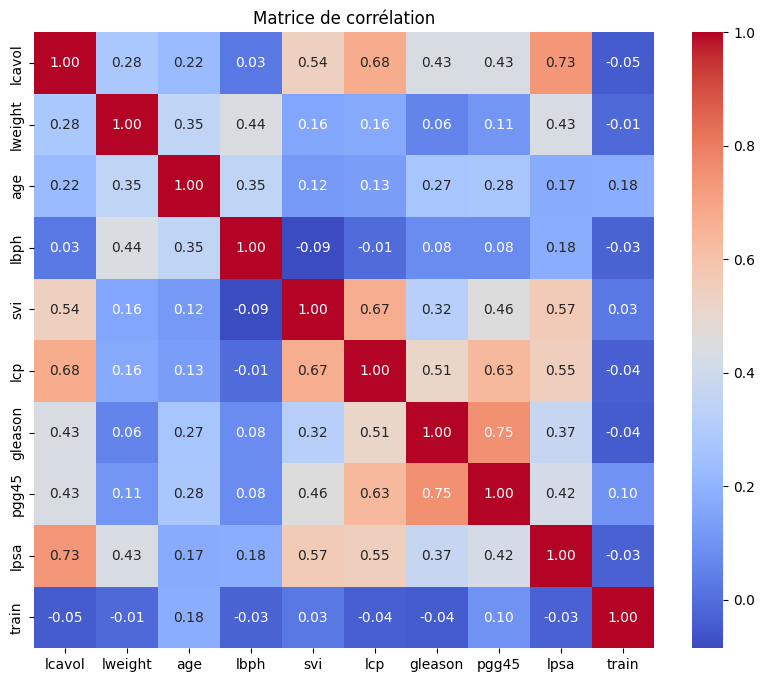

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


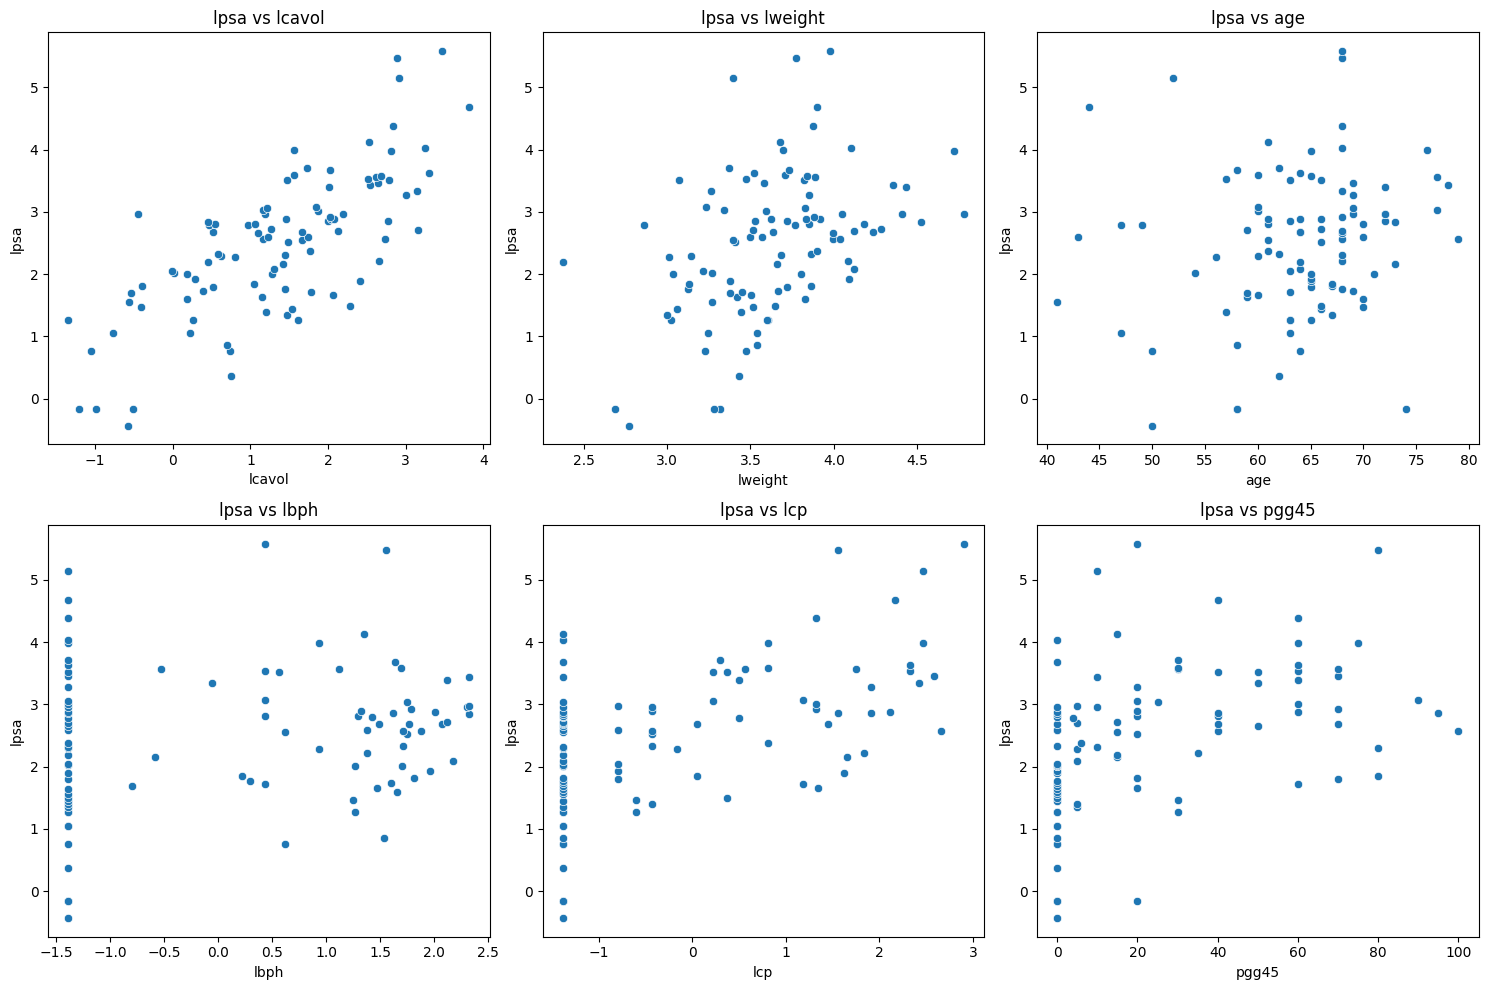

In [ ]:
cols = ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45']
n_cols = 3  # nombre de colonnes dans la grille de subplots
n_rows = -(-len(cols) // n_cols)  # arrondi vers le haut

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # pour un accès simple avec un seul index

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='lpsa', ax=axes[i])
    axes[i].set_title(f'lpsa vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('lpsa')

# Supprimer les axes vides s’il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


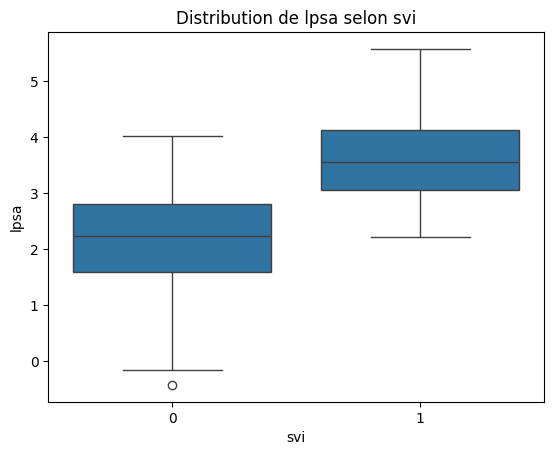

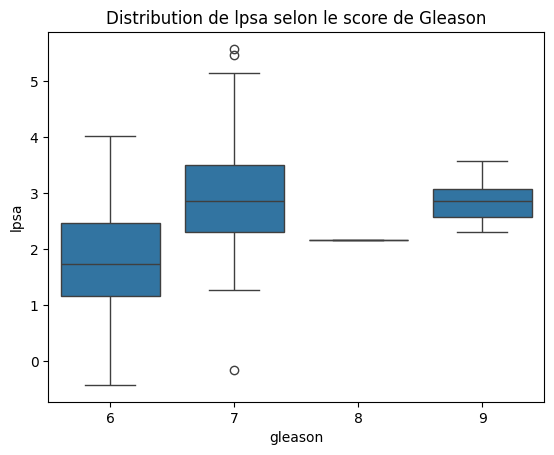

In [ ]:
sns.boxplot(data=df, x='svi', y='lpsa')
plt.title("Distribution de lpsa selon svi")
plt.show()

sns.boxplot(data=df, x='gleason', y='lpsa')
plt.title("Distribution de lpsa selon le score de Gleason")
plt.show()


In [ ]:
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
X = df[features]
y = df['lpsa']

X_const = sm.add_constant(X)  # Intercept
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Tue, 27 May 2025   Prob (F-statistic):           7.65e-18
Time:                        14:10:56   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      1.321      0.137      0.8

<ipython-input-19-f65ffa62411d>:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=coef_df, x='Coefficient', y='Variable', join=False, color='royalblue')


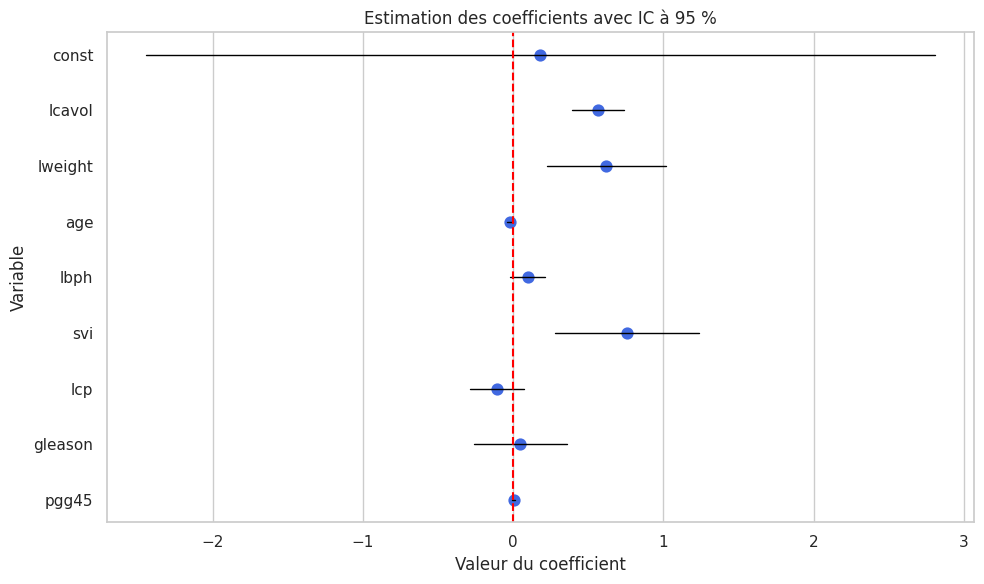

In [ ]:
# Récupération des coefficients et des intervalles de confiance
coef = model.params
conf = model.conf_int()
conf.columns = ['CI_lower', 'CI_upper']
coef_df = pd.concat([coef, conf], axis=1).reset_index()
coef_df.columns = ['Variable', 'Coefficient', 'CI_lower', 'CI_upper']

# Tracé du graphique
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.pointplot(data=coef_df, x='Coefficient', y='Variable', join=False, color='royalblue')
for i in range(coef_df.shape[0]):
    plt.plot([coef_df['CI_lower'][i], coef_df['CI_upper'][i]],
             [i, i], color='black', linewidth=1)
plt.axvline(0, color='red', linestyle='--')
plt.title("Estimation des coefficients avec IC à 95 %")
plt.xlabel("Valeur du coefficient")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()



#### 🔹 Forme du modèle ajusté

Le modèle de régression linéaire multiple estimé est :

$$
\hat{lpsa} = 0.1816 + 0.5643 \cdot lcavol + 0.6220 \cdot lweight - 0.0212 \cdot age + 0.0967 \cdot lbph + 0.7617 \cdot svi - 0.1061 \cdot lcp + 0.0492 \cdot gleason + 0.0045 \cdot pgg45
$$


#### 🔹 Qualité globale du modèle

- **R² = 0.663** : environ 66,3 % de la variabilité du logarithme du PSA (`lpsa`) est expliquée par les variables indépendantes.
- **R² ajusté = 0.633** : correction du nombre de variables, bonne stabilité du modèle.
- **Statistique F = 21.68** avec **p < 0.001** : le modèle est globalement significatif.

#### 🔹 Analyse individuelle des coefficients (tests t de Student)

- **lcavol** (p < 0.001) : très significatif. Une augmentation d'une unité de `lcavol` est associée à une augmentation moyenne de **0.564** de `lpsa`.
-  **lweight** (p = 0.003) : significatif. Chaque unité supplémentaire de `lweight` augmente `lpsa` de **0.622** en moyenne.
-  **svi** (p = 0.002) : significatif. L’invasion des vésicules séminales est associée à une augmentation de **0.762** de `lpsa`.
-  **age** (p = 0.058) : effet négatif proche du seuil de significativité, à surveiller.
-  **lbph, lcp, gleason, pgg45** (p > 0.05) : non significatifs au seuil de 5 % ; pas de lien statistique clair avec `lpsa`.





In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use X_const for VIF (includes the intercept)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["feature"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data



,feature
0,345.714819
1,2.102650
2,1.453326
3,1.336099
4,1.385040
5,1.955928
6,3.097954
7,2.468891
8,2.974075


###  Analyse de la Multicolinéarité — VIF (Variance Inflation Factor)

Le **VIF** (Variance Inflation Factor) mesure le degré de multicolinéarité entre une variable indépendante et les autres variables du modèle. Il permet de détecter les redondances entre les variables explicatives.

- **VIF = 1** : Pas de colinéarité.
- **1 < VIF < 5** : Colinéarité modérée, acceptable.
- **VIF > 5** : Colinéarité élevée, à surveiller.
- **VIF > 10** : Colinéarité très forte, variable à potentiellement retirer.

#### Interprétation des résultats :
Toutes les variables ont un VIF inférieur à 5, ce qui indique **une colinéarité acceptable** dans l’ensemble. Il n’est donc **pas nécessaire de supprimer** de variables.

| Variable  | VIF        | Interprétation |
|-----------|------------|----------------|
| `lcavol`  | 2.10       | Aucune inquiétude |
| `lweight` | 1.45       | Très faible colinéarité |
| `age`     | 1.33       | Faible colinéarité |
| `lbph`    | 1.39       | Acceptable |
| `svi`     | 1.96       | Rien à signaler |
| `lcp`     | 3.10       | Colinéarité modérée |
| `gleason` | 2.47       | Acceptable |
| `pgg45`   | 2.97       | À surveiller en cas de modèle plus complexe |


In [ ]:
vif_data_no_const = vif_data.iloc[1:].reset_index(drop=True)
vif_data_no_const



,feature
0,2.102650
1,1.453326
2,1.336099
3,1.385040
4,1.955928
5,3.097954
6,2.468891
7,2.974075


In [ ]:
coefs_no_inter=coef_df.iloc[1:].reset_index(drop=True)
vif_data_no_inter=vif_data_no_const.iloc[0:].reset_index(drop=True)
vif_data_no_inter

,feature
0,2.102650
1,1.453326
2,1.336099
3,1.385040
4,1.955928
5,3.097954
6,2.468891
7,2.974075


In [ ]:
merged = pd.concat([coefs_no_inter, vif_data_no_inter], axis=1)

merged

,Variable,Coefficient,CI_lower,CI_upper,feature
0,lcavol,0.564341,0.389791,0.738892,2.102650
1,lweight,0.622020,0.222780,1.021260,1.453326
2,age,-0.021248,-0.043275,0.000779,1.336099
3,lbph,0.096713,-0.018377,0.211802,1.385040
4,svi,0.761673,0.282387,1.240959,1.955928
5,lcp,-0.106051,-0.284645,0.072543,3.097954
6,gleason,0.049228,-0.259479,0.357935,2.468891
7,pgg45,0.004458,-0.004218,0.013133,2.974075


<ipython-input-24-e04a5d621370>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=merged, x="Variable", y="feature", palette="coolwarm")


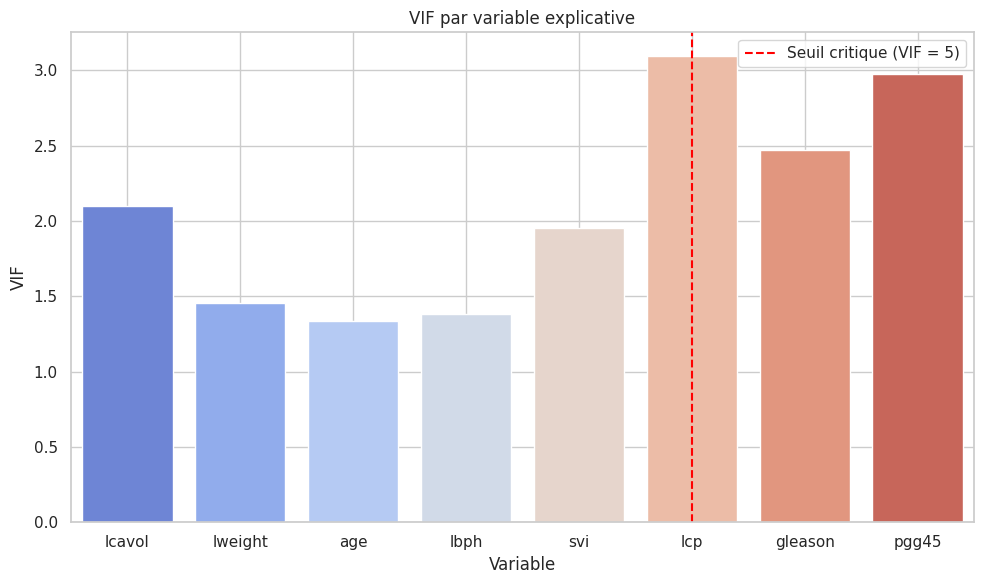

In [ ]:

# Visualisation
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=merged, x="Variable", y="feature", palette="coolwarm")
plt.title("VIF par variable explicative")
plt.xlabel("Variable")
plt.ylabel("VIF")
plt.axvline(5, color='red', linestyle='--', label='Seuil critique (VIF = 5)')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### **Data Preparation**

In [ ]:
# Séparer les données train/test selon la colonne 'train'
train_df = df[df['train'] == True]
test_df = df[df['train'] == False]

# Variables explicatives
X_train = train_df.drop(columns=['lpsa', 'train'])
X_test = test_df.drop(columns=['lpsa', 'train'])

# Variable cible
y_train = train_df['lpsa']
y_test = test_df['lpsa']


# Modèle de Régression Linéaire

Le modèle de régression linéaire s’écrit sous la forme :

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

où :

- $\hat{y} $ est la variable à prédire (ici, `lpsa`)
- $\beta_0$ est l’ordonnée à l’origine (intercept)
- $\beta_1, \beta_2 , ...,\beta_p $ sont les coefficients des variables explicatives $ x_1, x_2, .., x_p $

L'objectif est de trouver les coefficients \( \beta \) qui minimisent l'erreur quadratique moyenne :

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


### **Prediction**

In [ ]:
# Modèle de régression linéaire
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédictions
y_pred_lin = lin_reg.predict(X_test)

# Évaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"MSE Régression Linéaire : {mse_lin:.4f}")
print(f"R² Régression Linéaire  : {r2_lin:.4f}")

MSE Régression Linéaire : 0.5213
R² Régression Linéaire  : 0.5034


# Régression Lasso  
Le modèle Lasso cherche à minimiser la fonction de coût suivante
en ajoutant d'une pénalité sur les coefficients :
$$
\min_{\beta_0, \beta} \left\{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$$

CV = 2, Meilleur lambda : 0.0221
MSE (test) : 0.5023
R² (test)  : 0.5215
----------------------------------------
CV = 3, Meilleur lambda : 0.0255
MSE (test) : 0.5012
R² (test)  : 0.5225
----------------------------------------
CV = 4, Meilleur lambda : 0.0156
MSE (test) : 0.5052
R² (test)  : 0.5187
----------------------------------------
CV = 5, Meilleur lambda : 0.0156
MSE (test) : 0.5052
R² (test)  : 0.5187
----------------------------------------
CV = 6, Meilleur lambda : 0.0156
MSE (test) : 0.5052
R² (test)  : 0.5187
----------------------------------------
CV = 7, Meilleur lambda : 0.0221
MSE (test) : 0.5023
R² (test)  : 0.5215
----------------------------------------
CV = 8, Meilleur lambda : 0.0180
MSE (test) : 0.5040
R² (test)  : 0.5198
----------------------------------------
CV = 9, Meilleur lambda : 0.0156
MSE (test) : 0.5052
R² (test)  : 0.5187
----------------------------------------
CV = 10, Meilleur lambda : 0.0156
MSE (test) : 0.5052
R² (test)  : 0.5187
--------------

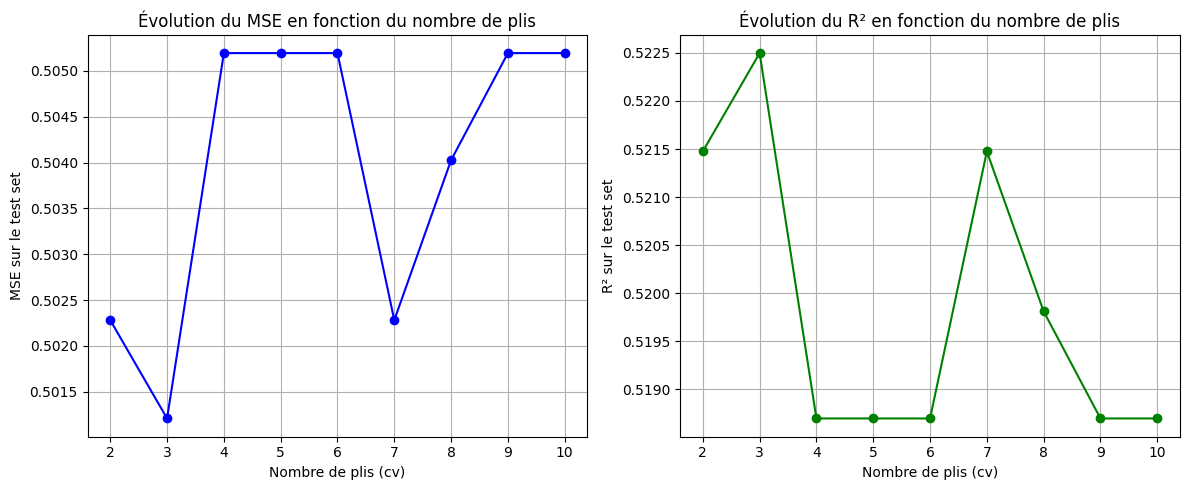

In [ ]:
from sklearn.linear_model import LassoCV

mse_list = []
r2_list = []
cv_range = range(2, 11)

# Apprentissage avec validation croisée pour différents cv
for cv in cv_range:
    lasso_cv = LassoCV(cv=cv, random_state=0)
    lasso_cv.fit(X_train, y_train)

    best_alpha = lasso_cv.alpha_
    print(f"CV = {cv}, Meilleur lambda : {best_alpha:.4f}")

    # Prédictions sur le jeu de test
    y_pred = lasso_cv.predict(X_test)

    # Calcul des erreurs
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"MSE (test) : {mse:.4f}")
    print(f"R² (test)  : {r2:.4f}")
    print("-" * 40)

# Tracé des courbes
plt.figure(figsize=(12, 5))

# Courbe MSE
plt.subplot(1, 2, 1)
plt.plot(cv_range, mse_list, marker='o', color='blue')
plt.title("Évolution du MSE en fonction du nombre de plis")
plt.xlabel("Nombre de plis (cv)")
plt.ylabel("MSE sur le test set")
plt.grid(True)

# Courbe R²
plt.subplot(1, 2, 2)
plt.plot(cv_range, r2_list, marker='o', color='green')
plt.title("Évolution du R² en fonction du nombre de plis")
plt.xlabel("Nombre de plis (cv)")
plt.ylabel("R² sur le test set")
plt.grid(True)

plt.tight_layout()
plt.show()

On choisit CV = 3, Meilleur lambda : 0.0255 \\
MSE (test) : 0.5012 \\
R² (test)  : 0.5225

## Régression Ridge :
Ajout d'une pénalité sur la **norme L2** des coefficients :

$$
\min_{\beta_0, \beta} \left\{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}
$$

 **Effet** : Réduit les coefficients, mais **ne les met jamais à zéro**.

CV = 2, Lambda  : 1.8738
MSE (test) : 0.5221
R² (test)  : 0.5026
----------------------------------------
CV = 3, Lambda  : 13.2194
MSE (test) : 0.5365
R² (test)  : 0.4889
----------------------------------------
CV = 4, Lambda  : 2.4771
MSE (test) : 0.5227
R² (test)  : 0.5020
----------------------------------------
CV = 5, Lambda  : 5.7224
MSE (test) : 0.5267
R² (test)  : 0.4982
----------------------------------------
CV = 6, Lambda  : 35.1119
MSE (test) : 0.5685
R² (test)  : 0.4584
----------------------------------------
CV = 7, Lambda  : 26.5609
MSE (test) : 0.5558
R² (test)  : 0.4705
----------------------------------------
CV = 8, Lambda  : 13.2194
MSE (test) : 0.5365
R² (test)  : 0.4889
----------------------------------------
CV = 9, Lambda  : 17.4753
MSE (test) : 0.5425
R² (test)  : 0.4832
----------------------------------------
CV = 10, Lambda  : 13.2194
MSE (test) : 0.5365
R² (test)  : 0.4889
----------------------------------------


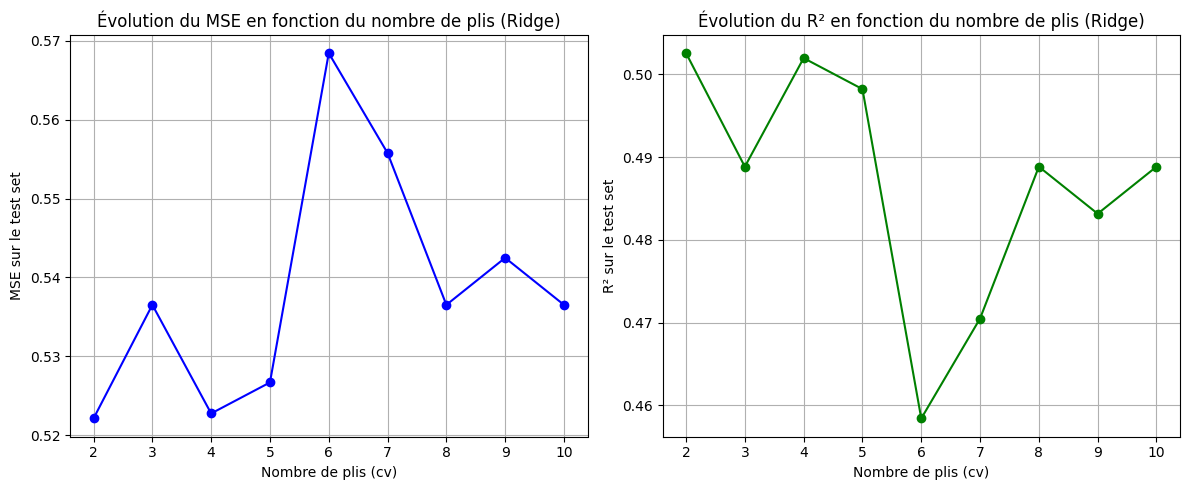

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

mse_list = []
r2_list = []
cv_range = range(2, 11)

# Définir une plage de lambdas (alphas) à tester
alphas_ridge = np.logspace(-3, 3, 100)  # de 0.001 à 100

# Apprentissage avec validation croisée pour différents cv
for cv in cv_range:
    ridge_cv = RidgeCV(alphas=alphas_ridge, cv=cv)
    ridge_cv.fit(X_train, y_train)

    alpha = ridge_cv.alpha_
    print(f"CV = {cv}, Lambda  : {alpha:.4f}")

    # Prédictions sur le jeu de test
    y_pred = ridge_cv.predict(X_test)

    # Calcul des erreurs
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"MSE (test) : {mse:.4f}")
    print(f"R² (test)  : {r2:.4f}")
    print("-" * 40)

# Tracé des courbes
plt.figure(figsize=(12, 5))

# Courbe MSE
plt.subplot(1, 2, 1)
plt.plot(cv_range, mse_list, marker='o', color='blue')
plt.title("Évolution du MSE en fonction du nombre de plis (Ridge)")
plt.xlabel("Nombre de plis (cv)")
plt.ylabel("MSE sur le test set")
plt.grid(True)

# Courbe R²
plt.subplot(1, 2, 2)
plt.plot(cv_range, r2_list, marker='o', color='green')
plt.title("Évolution du R² en fonction du nombre de plis (Ridge)")
plt.xlabel("Nombre de plis (cv)")
plt.ylabel("R² sur le test set")
plt.grid(True)

plt.tight_layout()
plt.show()


Pour CV = 2 ; Meilleure lamda 1.8738 \\
MSE (test) : 0.5221 \\
R² (test)  : 0.5026

## L'Elastic Net :
est une méthode de régression qui combine les pénalités **Lasso** (L1) et **Ridge** (L2). Elle est utile lorsqu'on souhaite à la fois faire de la **sélection de variables** et **réduire le surapprentissage**.



### 🧮 Formule :

On cherche à minimiser la fonction suivante :

$$ \frac{1}{2n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \left[ \alpha \sum_{j=1}^p |\beta_j| + \frac{1 - \alpha}{2} \sum_{j=1}^p \beta_j^2 \right]
$$

où :

- $ y_i$ : la vraie valeur cible pour l’observation \( i \)
- $ \hat{y}_i = \sum_{j=1}^p X_{ij} \beta_j $ : la prédiction pour l’observation \( i \)
-  $\beta_j$ : coefficient associé à la variable $ j $
- $ n $ : nombre d’observations
- $ p $ : nombre de variables (features)
- $ \lambda $ : paramètre de régularisation global
- $ \alpha \in [0,1] $ : pondère les pénalités L1 (Lasso) et L2 (Ridge)$$


In [ ]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(
    l1_ratio=[0.1,0.3, 0.5, 0.7, 0.9, 1],  # L1 vs L2 mix (alpha)
    alphas=np.logspace(-3, 1, 50),     # 50 Lambda candidates entre 10^-3 et 10^1 choisis
    cv=5,
    random_state=0
)

elastic_cv.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleur alpha (lambda) :", elastic_cv.alpha_)
print("Meilleur l1_ratio :", elastic_cv.l1_ratio_)

# Évaluation
y_pred_elastic_cv = elastic_cv.predict(X_test)
print("MSE ElasticNetCV :", mean_squared_error(y_test, y_pred_elastic_cv))
print("R² ElasticNetCV  :", r2_score(y_test, y_pred_elastic_cv))



Meilleur alpha (lambda) : 0.001
Meilleur l1_ratio : 0.1
MSE ElasticNetCV : 0.5210783039544523
R² ElasticNetCV  : 0.5035662960106653


### 📊 Tableau comparatif des modèles de régression

| Modèle               | Méthode             | Paramètres principaux           | MSE (test) |
|----------------------|---------------------|----------------------------------|------------|
| Régression Linéaire  | Linéaire simple     | Aucun                            | 0.5213     |
| Lasso                | Régression L1       | λ = 0.0255                       | 0.5012     |
| Ridge                | Régression L2       | λ = 1.8738                       | 0.5221     |
| Elastic Net          | L1 + L2 combinés    | λ = 0.001, l1_ratio = 0.1        | 0.5211     |


#---> Modèle choisi : Lasso

Coefficients Lasso :
lcavol     0.563407
lweight    0.555160
age       -0.017268
lbph       0.140948
svi        0.562291
lcp       -0.146627
gleason   -0.000000
pgg45      0.008434
dtype: float64


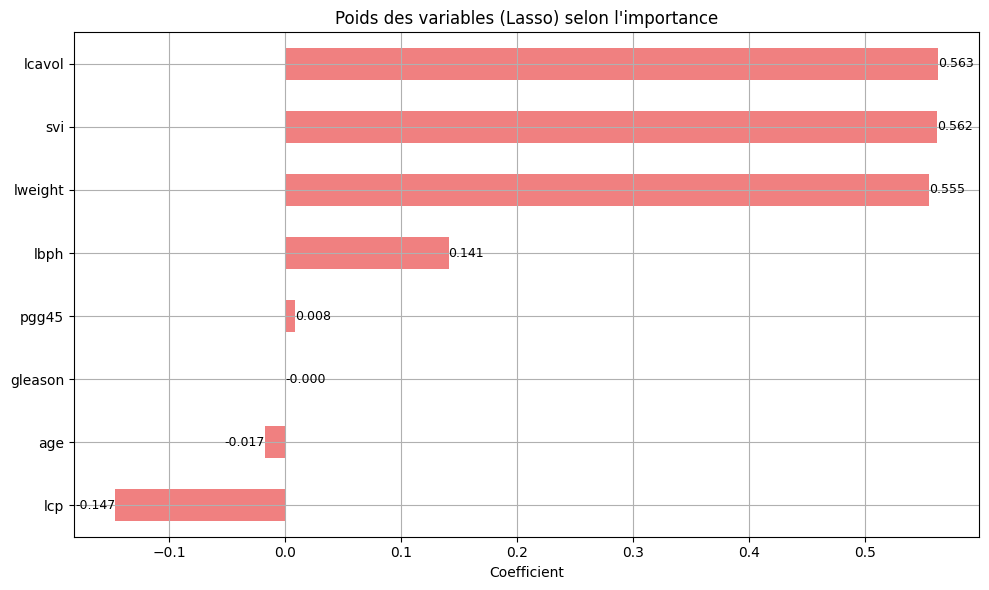

In [ ]:
# Coefficients du modèle Lasso
coef_lasso = pd.Series(lasso_cv.coef_, index=X_train.columns)
print("Coefficients Lasso :")
print(coef_lasso)

# Visualisation avec valeurs
plt.figure(figsize=(10, 6))
coef_lasso_sorted = coef_lasso.sort_values()
bars = coef_lasso_sorted.plot(kind='barh', color='lightcoral')

plt.title("Poids des variables (Lasso) selon l'importance")
plt.xlabel("Coefficient")
plt.grid(True)

# Ajouter les valeurs sur les barres
for i, (val, name) in enumerate(zip(coef_lasso_sorted.values, coef_lasso_sorted.index)):
    plt.text(val, i, f'{val:.3f}', va='center',
             ha='left' if val >= 0 else 'right',
             fontsize=9, color='black')

plt.tight_layout()
plt.show()


## Créer le modèle Lasso avec lambda = 0.0255

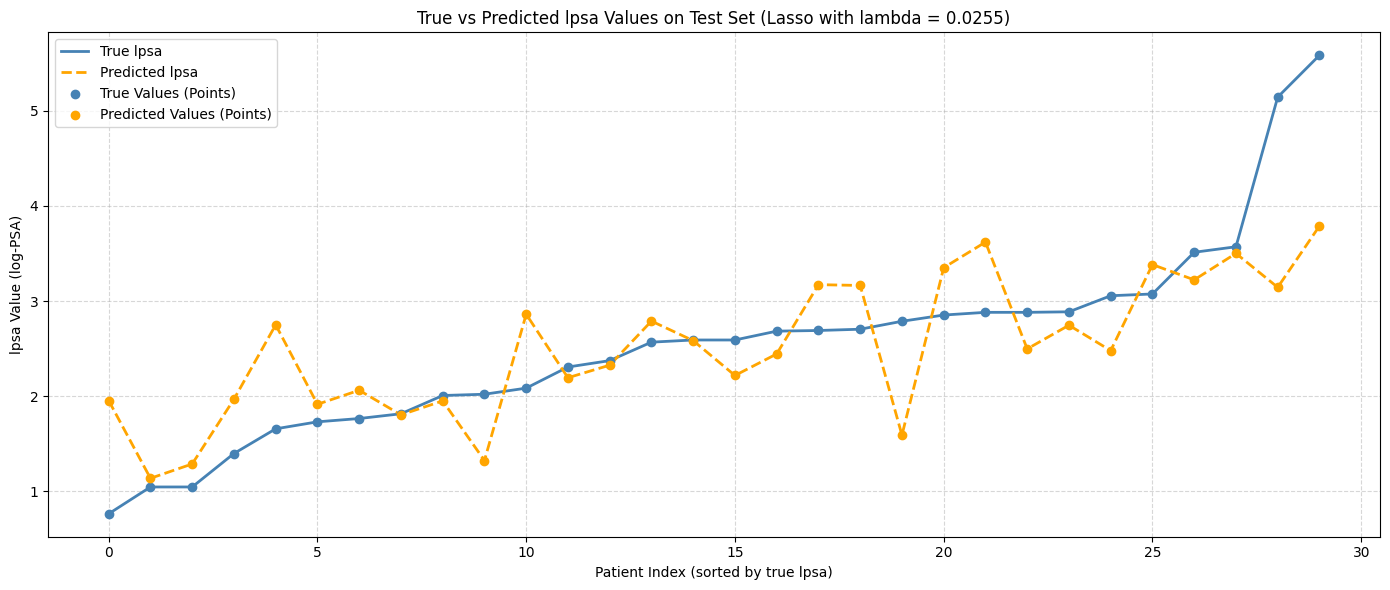

In [ ]:
from sklearn.linear_model import Lasso

# Créer le modèle Lasso avec lambda = 0.0255 (alpha en Lasso)
lasso_model = Lasso(alpha=0.0255)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Trier les indices par les valeurs réelles
sorted_idx = np.argsort(y_test)
y_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = np.array(y_pred)[sorted_idx]

# Créer un index d'échantillons (patient)
x = np.arange(len(y_test))

# Visualisation
plt.figure(figsize=(14, 6))

# Tracer les valeurs réelles (True) comme une ligne solide
plt.plot(x, y_sorted, label='True lpsa', color='steelblue', linewidth=2)

# Tracer les valeurs prédites (Predicted) comme une ligne en pointillés
plt.plot(x, y_pred_sorted, label='Predicted lpsa', color='orange', linestyle='--', linewidth=2)

# Ajouter les points pour les valeurs réelles
plt.scatter(x, y_sorted, color='steelblue', marker='o', label='True Values (Points)', zorder=5)

# Ajouter les points pour les valeurs prédites
plt.scatter(x, y_pred_sorted, color='orange', marker='o', label='Predicted Values (Points)', zorder=5)

# Ajouter les labels et le titre
plt.xlabel('Patient Index (sorted by true lpsa)')
plt.ylabel('lpsa Value (log-PSA)')
plt.title('True vs Predicted lpsa Values on Test Set (Lasso with lambda = 0.0255)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Ajuster l'affichage
plt.tight_layout()
plt.show()


# 🔍 Analyse des résultats – Régression Lasso (lambda = 0.0255)

## ⚙️ Observations principales

### 📈 Performance globale

- Les **prédictions** (ligne orange en pointillés) suivent assez bien la **tendance des valeurs réelles** (ligne bleue), notamment pour les **valeurs intermédiaires de lpsa**.
- Le modèle **capture la tendance générale**, mais **commet certaines erreurs de prédiction**.

---

### ✅ Zones de bonne prédiction

- Pour les patients avec des valeurs de **lpsa autour de 2 à 3**, les prédictions sont **très proches des valeurs réelles**.
- La **corrélation** entre les valeurs prédites et réelles semble **bonne dans cette plage**.

---

### ⚠️ Zones d'erreur

- Pour les **valeurs extrêmes** (très faibles ou très élevées), le modèle a plus de difficulté :
  - Il **sous-estime** les **valeurs les plus élevées** (à droite du graphique).
  - Il **surestime** certaines **valeurs faibles** (à gauche du graphique).
- Ce comportement est **typique des modèles de régression**, qui ont tendance à **rétrécir les prédictions vers la moyenne**.

---

### 🧮 Interprétation de lambda

- Le **lambda choisi (0.0255)** semble offrir un bon **compromis entre biais et variance** :
  - Il est **assez élevé pour limiter le surajustement**.
  - Mais **pas trop élevé**, ce qui permet de **garder une bonne capacité prédictive**.


# **Random Forest Regressor**



```
# Ce texte est au format code
```

### 📐 Formulation mathématique

Soit $D = \{(x_i, y_i)\}_{i=1}^n$ notre ensemble de données d'entraînement.  
Pour chaque arbre $T_b$ construit à partir d'un échantillon bootstrap :

$$
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)
$$

Où :
- $B$ est le nombre total d'arbres dans la forêt.
- $T_b(x)$ est la prédiction de l’arbre $b$ pour l’entrée $x$.
- $\hat{y}$ est la prédiction finale du modèle.

Cette technique permet de réduire la variance et d’augmenter la robustesse des prédictions, tout en limitant le sur-apprentissage (overfitting).

---

### 📊 Métriques d’évaluation

#### 🔹 Erreur Absolue Moyenne (MAE) :

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

#### 🔹 Erreur Quadratique Moyenne (RMSE) :

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

#### 🔹 Coefficient de Détermination ($R^2$) :

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Un *$R^2$ proche de 1* indique un bon ajustement du modèle aux données.

---

In [ ]:
train_data = df[df["train"] == True].drop(columns=["train"])
test_data = df[df["train"] == False].drop(columns=["train"])

X_train = train_data.drop(columns=["lpsa"])
y_train = train_data["lpsa"]
X_test = test_data.drop(columns=["lpsa"])
y_test = test_data["lpsa"]
rf=RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [5,10,30, 50, 100,200],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10}
RMSE: 0.7641236649759977
MAE: 0.5822315591632581
R^2: 0.4437300904104805


### ⚙️ Fonction de Coût : la Variance des Prédictions

La Forêt Aléatoire minimise l’erreur quadratique moyenne entre les prédictions $\hat{y}$ et les vraies valeurs $y$. La fonction de coût sous-jacente est liée à la *variance* des sorties de l’arbre :

#### 🔹 Variance de la variable cible :

$$
\text{Var}(y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

Cette quantité est utilisée dans la construction de chaque arbre pour choisir les meilleures divisions (features + seuils) afin de *réduire l'impureté* (i.e., la variance) dans chaque sous-arbre.

L’objectif est de faire en sorte que chaque division mène à des sous-ensembles plus homogènes en termes de $y_i$, donc une *plus faible variance*.

---

<ipython-input-33-19bf9c4eaf18>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette=palette)
<ipython-input-33-19bf9c4eaf18>:30: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


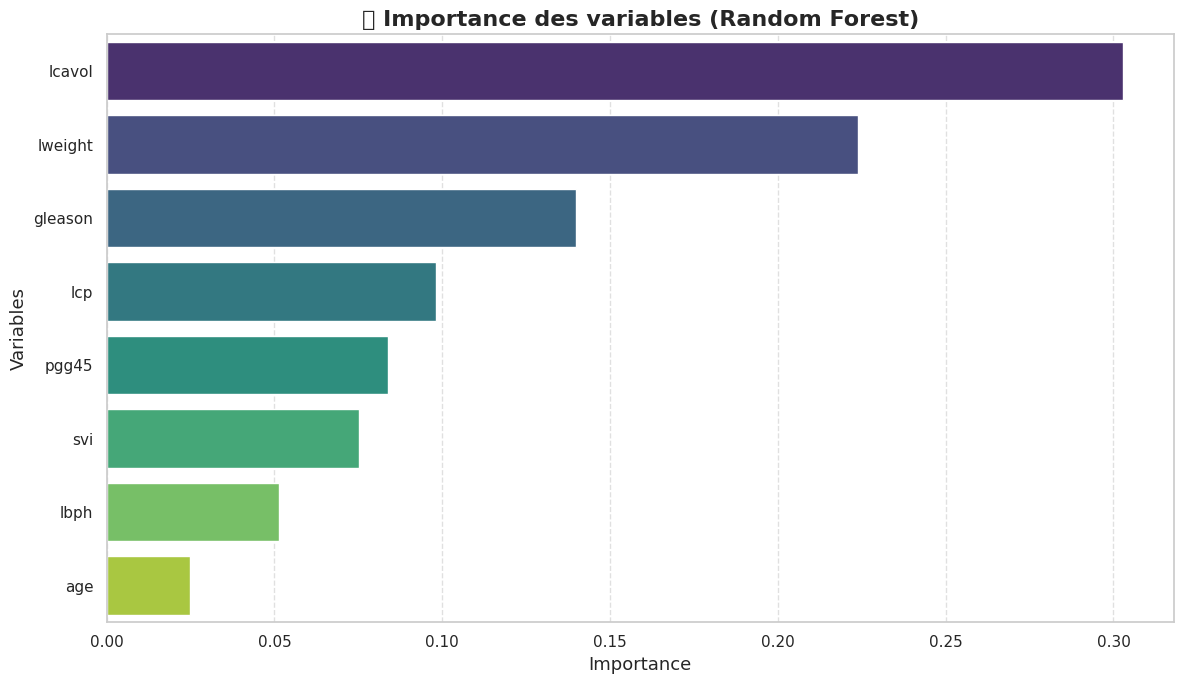

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Récupération des importances
importances = best_rf.feature_importances_
features = X_train.columns

# Création d'un DataFrame pour un tri plus clair
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Palette personnalisée
palette = sns.color_palette("viridis", len(feat_imp_df))

# Visualisation moderne
plt.figure(figsize=(12, 7))
sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette=palette)

# Ajout de détails pour la lisibilité
plt.title("🎯 Importance des variables (Random Forest)", fontsize=16, weight='bold')
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Variables", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-34-175347def138>:42: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


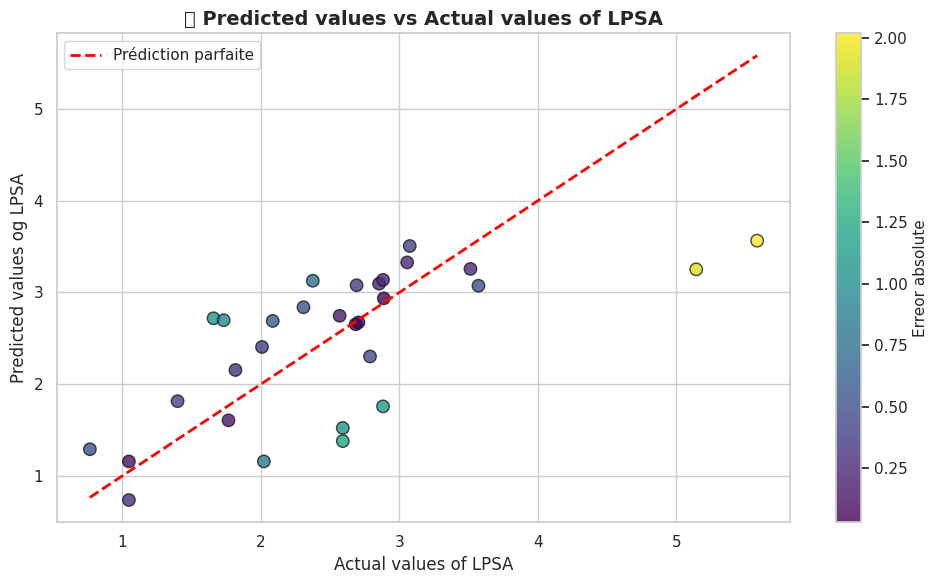

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Définir le style graphique
sns.set(style="whitegrid")

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracer les points avec une couleur qui reflète l'erreur absolue
scatter = plt.scatter(
    y_test, y_pred,
    c=np.abs(y_test - y_pred),  # Couleur selon l'erreur absolue
    cmap='viridis',             # Palette de couleurs
    edgecolor='k',              # Bordure noire autour des points
    alpha=0.8,                  # Transparence
    s=80                        # Taille des points
)

# Ligne de référence (prédiction parfaite : y = x)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linestyle='--', linewidth=2,
    label="Prédiction parfaite"
)

# Étiquettes et titre
plt.xlabel("Actual values of LPSA", fontsize=12)
plt.ylabel("Predicted values og LPSA", fontsize=12)
plt.title("🎯 Predicted values vs Actual values of LPSA", fontsize=14, weight='bold')

# Barre de couleur indiquant l’intensité de l’erreur
cbar = plt.colorbar(scatter)
cbar.set_label("Erreor absolute", fontsize=11)

# Afficher la légende
plt.legend()

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()


## Interprétabilité avec SHAP

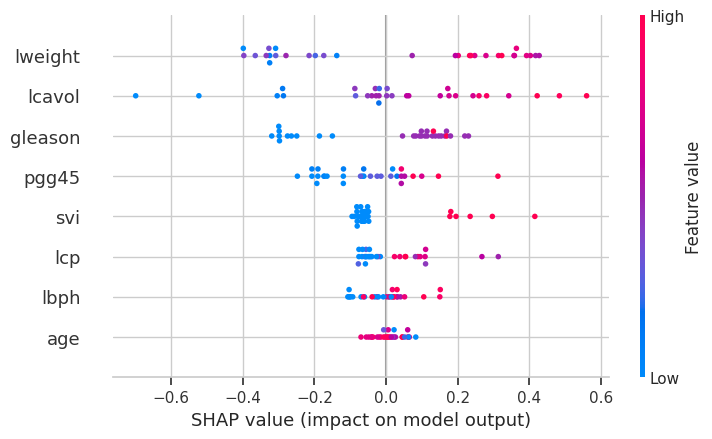

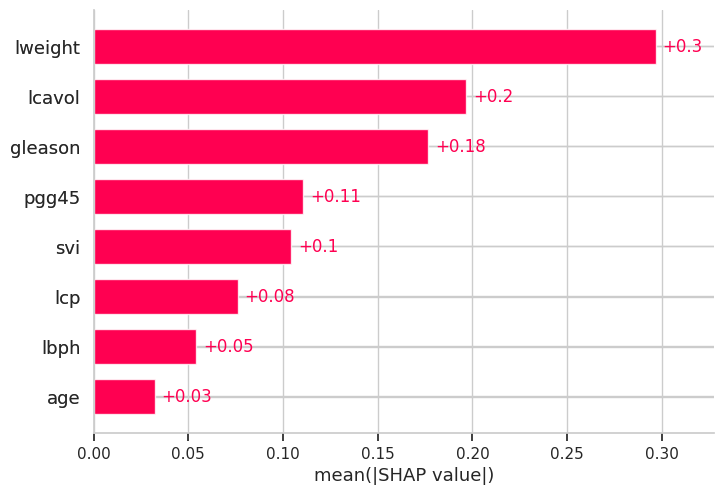

In [ ]:
import shap
# Calcul des valeurs SHAP
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)
# Visualisation détaillée type "beeswarm"
shap.plots.beeswarm(shap_values, max_display=10)
# Visualisation globale : importance moyenne des variables
shap.plots.bar(shap_values, max_display=10)  # top 10 variables


### 📊 Interprétation SHAP (SHapley Additive exPlanations)

#### 🔹 Graphe Beeswarm
Ce graphe visualise l'effet de chaque variable sur la prédiction du modèle pour **chaque observation** :
- L'axe X représente la **valeur SHAP**, qui mesure l’impact d’une variable sur la prédiction (positive ou négative).
- Chaque point correspond à une observation (un patient).
- La **couleur** indique la **valeur de la variable** (du bleu = valeur faible au rouge = valeur élevée).

Exemple :
- Des valeurs **élevées de `lweight`** (en rouge) tendent à **augmenter la prédiction**.
- Des valeurs **faibles de `gleason`** tendent à **diminuer la prédiction**.

#### 🔹 Graphe en barres
Ce graphe montre l’**importance moyenne absolue** des variables :
- `lweight`, `lcavol`, et `gleason` sont les plus influentes.
- `age`, `lbph` et `lcp` ont une influence plus faible.

#### ✅ Conclusion SHAP
- SHAP permet une **interprétation globale** du modèle ainsi qu’une **explication individuelle**.
- Cela permet d’identifier les variables ayant le plus fort impact global sur la sortie du modèle.


## Interprétabilité Local avec LAME

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


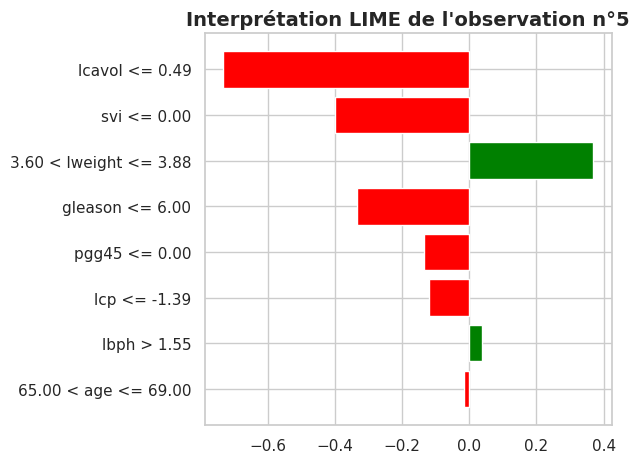

In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Instanciation de l'explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Choix d'une observation à expliquer (par exemple, la 5ème)
i = 5
exp = explainer.explain_instance(X_test.iloc[i].values, best_rf.predict, num_features=8)

# Affichage avec un rendu lisible et moderne
fig = exp.as_pyplot_figure()
plt.title(f"Interprétation LIME de l'observation n°{i}", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### 🔍 Interprétation LIME (Local Interpretable Model-agnostic Explanations)

LIME fournit une explication **locale** d'une prédiction pour une observation spécifique (ici : observation n°5).

#### 🔹 Lecture du graphique
- Les **barres rouges** indiquent les variables qui **diminuent la prédiction**.
- Les **barres vertes** montrent celles qui **augmentent la prédiction**.
- L'axe X indique l’**impact** de chaque variable sur la prédiction finale.

#### 🔸 Observation n°5
- ✅ `3.60 < lweight <= 3.88` : **augmente** significativement la prédiction.
- ✅ `lbph > 1.55` : effet légèrement positif.
- ❌ `lcavol <= 0.49`, `svi == 0`, `gleason <= 6.00` : **réduisent fortement** la prédiction.

#### ✅ Conclusion LIME
- LIME permet d’expliquer **pourquoi une prédiction particulière a été faite** pour un individu.
- C’est un outil très utile dans un contexte clinique ou décisionnel, pour justifier un diagnostic ou une décision automatisée.


## Interprétation des résultats du modèle Random Forest Regressor

###  Meilleurs hyperparamètres trouvés
Après une recherche par validation croisée (`GridSearchCV`), les meilleurs paramètres du modèle Random Forest sont :
- **n_estimators** = 10 (nombre d’arbres dans la forêt)
- **max_depth** = 5 (profondeur maximale des arbres)
- **min_samples_split** = 10 (nombre minimum d’échantillons pour diviser un nœud)
- **max_features** = 'sqrt' (nombre de variables sélectionnées à chaque division : racine carrée du nombre total)

Ces paramètres permettent de limiter le surapprentissage tout en conservant une certaine complexité.



### Performance du modèle
- **RMSE (Root Mean Squared Error)** = `0.76` : l’erreur quadratique moyenne est modérée, ce qui signifie que les prédictions du modèle s'écartent en moyenne de 0.76 unités de la valeur réelle.
- **MAE (Mean Absolute Error)** = `0.58` : en moyenne, les prédictions s'écartent de 0.58 unité, ce qui reste raisonnable.
- **R² (coefficient de détermination)** = `0.44` : le modèle explique **44 % de la variance** de la variable cible (`lpsa`), ce qui est **inférieur** à la régression linéaire multiple, indiquant que le modèle est **moins explicatif** dans ce cas précis.





### Conclusion
Le **Random Forest** permet d’obtenir une performance correcte avec peu de réglages, mais dans notre contexte, la **régression linéaire multiple reste plus performante** pour expliquer la variable `lpsa`. Cela peut s’expliquer par la nature linéaire des relations dans les données, que la régression linéaire capte mieux ici.

> Ce modèle peut tout de même être utile si des interactions non-linéaires apparaissent après enrichissement des données ou si l’on souhaite prioriser la prédiction au détriment de l’interprétation.


# **SVR (Support Vector Regression)**

## **📐 Formulation mathématique**

Le SVR cherche à approximer la fonction $f(x) = w^T x + b$ en tolérant une erreur maximale $\varepsilon$ autour de la vraie valeur. La **fonction de coût** du SVR linéaire s’écrit :

$$
\min_{w, b, \xi, \xi^*} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

Sous les contraintes :

$$
\begin{cases}
y_i - w^T x_i - b \leq \varepsilon + \xi_i \\
w^T x_i + b - y_i \leq \varepsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}
$$

- $\|w\|^2$ : complexité du modèle (on veut la minimiser)
- $C$ : coefficient de régularisation (contrôle la pénalisation des erreurs)
- $\varepsilon$ : marge d’insensibilité (tolérance)
- $\xi_i$, $\xi_i^*$ : variables de relâchement (slack variables)

---

## **Minimisation de fonction de coût**

In [ ]:
X = df.drop(columns=["lpsa","train"])
y = df["lpsa"]
# Paramètres du SVR
epsilon = 0.2
C = 1.0

# Liste pour stocker la progression de la perte
loss_progression = []

# Fonction de coût SVR linéaire
def svr_objective(wb):
    w = wb[:-1]
    b = wb[-1]
    y_pred = X.dot(w) + b
    error = y - y_pred
    loss = np.maximum(0, np.abs(error) - epsilon)
    total_loss = 0.5 * np.sum(w ** 2) + C * np.sum(loss)

    # Sauvegarder la progression
    loss_progression.append(total_loss)

    return total_loss

# Initialisation (poids + biais)
init_params = np.zeros(X.shape[1] + 1)

# Minimisation
result = minimize(svr_objective, init_params, method='L-BFGS-B')

# Résultats optimaux
w_opt = result.x[:-1]
b_opt = result.x[-1]

print("Vecteur des poids w* :", w_opt)
print("Biais optimal b* :", b_opt)

Vecteur des poids w* : [ 0.57116168  0.71678925 -0.0249538   0.11478275  0.52440758 -0.09692047
  0.0541239   0.00527568]
Biais optimal b* : 0.06011849551812044


### 🔧 Comment minimiser la fonction de coût

La fonction de coût n’est pas différentiable partout à cause de la fonction $\max(0, |y_i - f(x_i)| - \varepsilon)$, donc on utilise des **méthodes de programmation quadratique** (comme `L-BFGS-B` dans Scipy) pour trouver les paramètres $w$ et $b$ qui minimisent le coût.

> En pratique, nous avons simulé cette optimisation en utilisant `scipy.optimize.minimize` pour observer la descente de la fonction objectif.

---

## **Prédiction en utilisant SVR**

In [ ]:
# Séparation des données
train_data = df[df["train"] == True].drop(columns=["train"])
test_data = df[df["train"] == False].drop(columns=["train"])

X_train = train_data.drop(columns=["lpsa"])
y_train = train_data["lpsa"]
X_test = test_data.drop(columns=["lpsa"])
y_test = test_data["lpsa"]

pipeline = make_pipeline(StandardScaler(), SVR())

# Grille des hyperparamètres
param_grid = {
    "svr__C": [0.1, 1, 10],
    "svr__epsilon": [0.01, 0.1, 0.2, 0.5],
    "svr__gamma": ['scale', 'auto', 0.01, 0.1],
    "svr__kernel": ['linear', 'rbf', 'poly'],
}

# GridSearchCV avec scoring multiple
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring={"MSE": "neg_mean_squared_error", "MAE": "neg_mean_absolute_error", "R2": "r2"},
    refit="MSE",
    n_jobs=-1
)

# Entraînement sur l'ensemble d'entraînement
grid.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Best Parameters:", grid.best_params_)

# Prédiction sur le test set
y_pred_test = grid.best_estimator_.predict(X_test)

# Évaluation finale
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R²:", r2_score(y_test, y_pred_test))


Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Test RMSE: 0.7202547259196954
Test MAE: 0.5537868902256903
Test R²: 0.5057684096023216


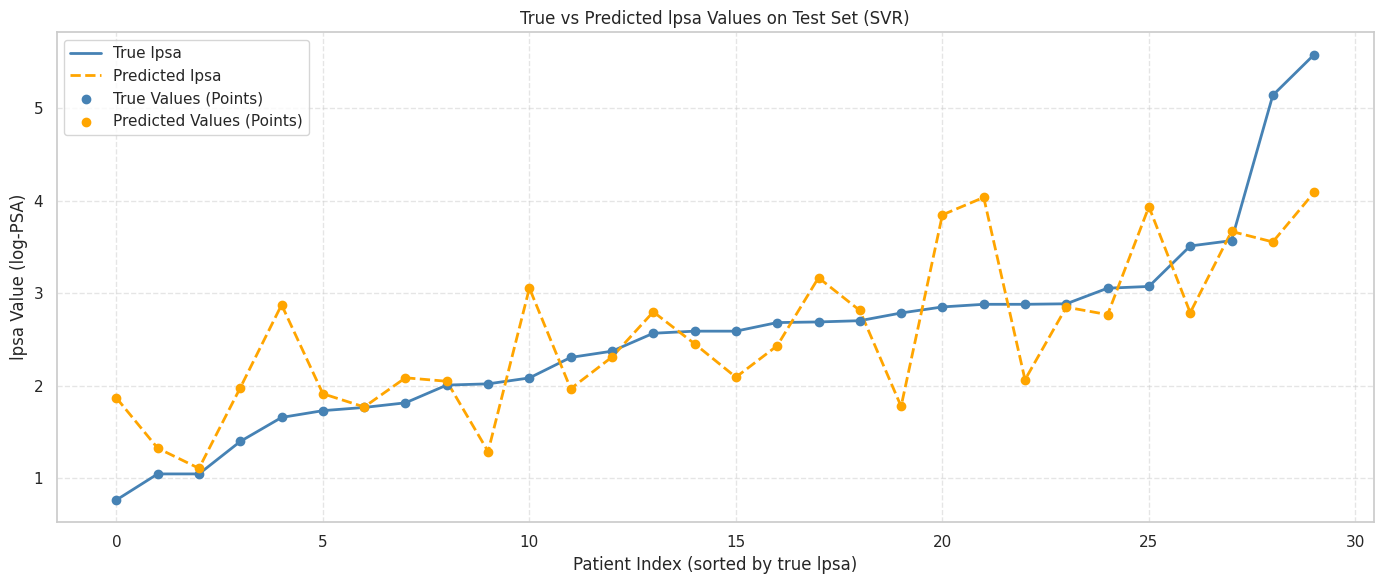

In [ ]:
# Sort by actual test values
sorted_idx = np.argsort(y_test)
y_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = np.array(y_pred_test)[sorted_idx]

# Plot the true and predicted lpsa values
x = np.arange(len(y_test))  # patient index

plt.figure(figsize=(14, 6))

#true values
plt.plot(x, y_sorted, label='True lpsa', color='steelblue', linewidth=2)

#predicted values
plt.plot(x, y_pred_sorted, label='Predicted lpsa', color='orange', linestyle='--', linewidth=2)

# Add points for true values
plt.scatter(x, y_sorted, color='steelblue', marker='o', label='True Values (Points)', zorder=5)

# Add points for predicted values
plt.scatter(x, y_pred_sorted, color='orange', marker='o', label='Predicted Values (Points)', zorder=5)

# Labels and title
plt.xlabel('Patient Index (sorted by true lpsa)')
plt.ylabel('lpsa Value (log-PSA)')
plt.title('True vs Predicted lpsa Values on Test Set (SVR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## **Interprétation des résultats du SVR**

### 🔍 Meilleurs hyperparamètres trouvés

Après une recherche par validation croisée avec `GridSearchCV`, les meilleurs paramètres pour le modèle **SVR (Support Vector Regression)** sont :

- **C** = 0.1 : pénalité faible pour les erreurs, favorise une marge large au détriment de l'ajustement précis.
- **epsilon** = 0.01 : tolérance très faible dans laquelle les erreurs ne sont pas pénalisées, ce qui force le modèle à mieux coller aux données.
- **gamma** = `'scale'` : paramètre du noyau automatiquement ajusté en fonction des données.
- **kernel** = `'linear'` : le modèle suppose une relation linéaire entre les variables explicatives et la cible.

Ces paramètres indiquent que le modèle privilégie la **simplicité et la régularisation**, ce qui limite le risque de surapprentissage.

---

### 📈 Performance du modèle

- **RMSE (Root Mean Squared Error)** = `0.72` : l’erreur quadratique moyenne est modérée ; les prédictions s’écartent en moyenne de 0.72 unités par rapport aux vraies valeurs.
- **MAE (Mean Absolute Error)** = `0.55` : les prédictions ont un écart absolu moyen de 0.55, ce qui montre une erreur raisonnable.
- **R² (coefficient de détermination)** = `0.51` : le modèle explique **environ 51 % de la variance** de la variable cible (`lpsa`).

Ces résultats montrent une **meilleure performance globale** que le modèle Random Forest testé auparavant (**R² = 0.44**).

---

### 🧾 Conclusion

Le **SVR avec noyau linéaire** s'avère être un compromis efficace entre **complexité, régularisation et performance**. Bien qu’il soit moins explicatif qu’une régression linéaire multiple, il dépasse un modèle non-linéaire comme Random Forest en termes de capacité à prédire `lpsa`. Cela confirme que les relations dans les données sont **principalement linéaires**, ce que le noyau linéaire capte correctement tout en introduisant une **régularisation fine** via `C` et `epsilon`.

> ✅ Ce modèle peut être privilégié dans des contextes où la généralisation est importante et où l’on souhaite éviter le surajustement tout en conservant une certaine robustesse aux données bruitées.


## **Interprétation SHAP**

### ⚠️ Remarque
Le modèle SVR(kernel="linear") de sklearn.svm n'est pas directement compatible avec SHAP, mais son équivalent LinearSVR (sans noyau explicite) l'est, car il est basé sur une formulation linéaire optimisée.


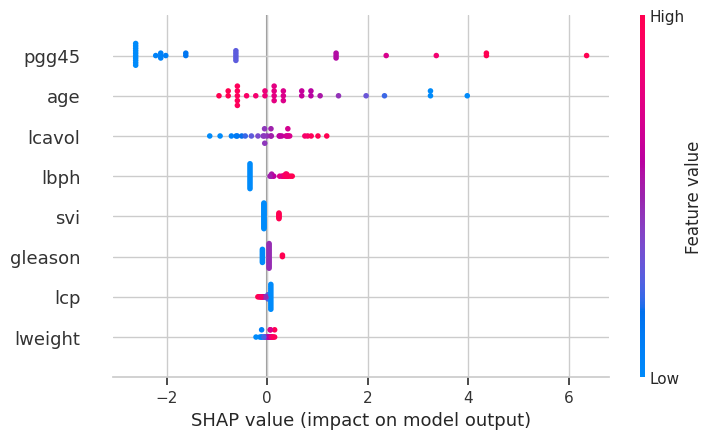

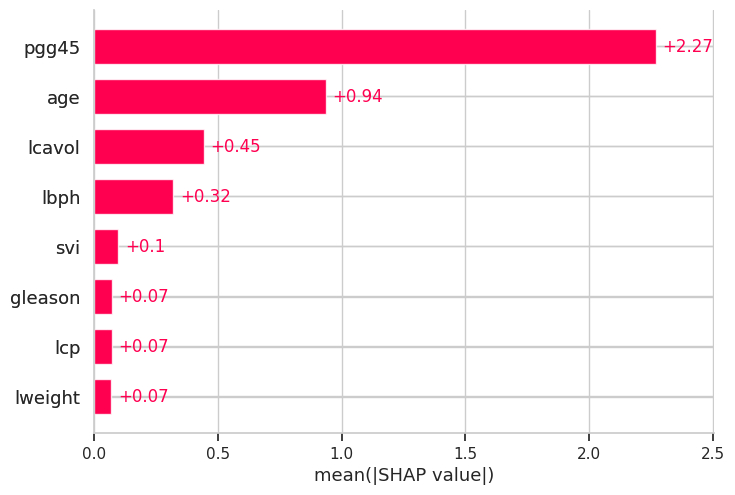

In [ ]:
# 🧠 Création du modèle LinearSVR (équivalent de SVR linéaire)
model = make_pipeline(StandardScaler(), LinearSVR(C=0.1, epsilon=0.01, max_iter=10000, random_state=42))
model.fit(X_train, y_train)

# 🎯 Prédictions (optionnel)
y_pred = model.predict(X_test)

# 💡 SHAP explainer (pour modèle linéaire)
explainer = shap.Explainer(model.named_steps["linearsvr"], X_train, feature_names=X_train.columns)

# 📊 Valeurs SHAP pour l'ensemble de test
shap_values = explainer(X_test)

# 📈 Résumé graphique (importance globale)
shap.plots.beeswarm(shap_values, max_display=10)

# 🔍 Importance moyenne par variable
shap.plots.bar(shap_values, max_display=10)

### 🎯 Interprétation des valeurs SHAP du modèle SVR

#### 🔍 1. Analyse globale des variables importantes

Le graphique SHAP (SHapley Additive exPlanations) ci-dessus permet de comprendre **l'impact de chaque variable** sur la prédiction du modèle **SVR linéaire**. Voici les principales observations :

- **`pgg45`** est **de loin la variable la plus influente**, avec une contribution moyenne de **+2.27** sur les prédictions. Cela signifie que les valeurs élevées de `pgg45` (en rouge) tendent à **augmenter fortement** la sortie du modèle.
- **`age`** est la deuxième variable la plus importante (**+0.94**), les individus plus âgés ayant également un impact positif sur la prédiction.
- **`lcavol`** et **`lbph`** suivent, avec des impacts modérés (**+0.45** et **+0.32**, respectivement).
- Les variables **`svi`, `gleason`, `lcp`, `lweight`** ont un impact faible ou négligeable (< 0.1 en moyenne).

#### 🌀 2. Comportement des variables (SHAP Summary Plot)

Dans le graphique de dispersion SHAP (en haut) :

- Chaque point correspond à un individu de l'échantillon.
- La **couleur indique la valeur** de la variable (🔵 faible, 🔴 élevée).
- La **position horizontale indique l'effet** sur la prédiction (valeur SHAP) :
  - Valeurs > 0 ⟹ augmentation de la prédiction.
  - Valeurs < 0 ⟹ réduction de la prédiction.

**Exemples** :
- Pour `pgg45`, des valeurs élevées (en rouge) ont un **effet fort et positif** sur la prédiction.
- Pour `age`, les personnes plus âgées (en rouge) tendent également à faire **augmenter la prédiction**.

---

### ✅ Conclusion

- Le modèle SVR accorde une **importance majeure à `pgg45`**, suivi de `age` et `lcavol`.
- Cette interprétation SHAP permet de **valider la cohérence** des résultats avec les attentes cliniques ou métier (par exemple, la progression tumorale mesurée par `pgg45`).
- L’explicabilité locale et globale via SHAP offre une **vision fine et fiable** du fonctionnement du modèle.


## **Interprétation LIME**

In [ ]:
model = make_pipeline(
    StandardScaler(),
    SVR(kernel="linear", C=0.1, epsilon=0.01, gamma="scale")
)

# 🎓 Entraînement du modèle
model.fit(X_train, y_train)

# 🔍 Initialisation de l'explainer LIME pour les données tabulaires
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression',
    verbose=True,
    random_state=42
)

# 🎯 Choisir une instance à expliquer (par exemple, la 5ème de l'ensemble test)
i = 5
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=model.predict
)

# 📈 Affichage de l'explication
exp.show_in_notebook(show_table=True)

Intercept 3.486898711723299
Prediction_local [0.49569895]
Right: 1.9146960300391669


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 🎯 Interprétation locale avec LIME (Local Interpretable Model-Agnostic Explanations)

L’image ci-dessus montre l’explication de la **prédiction locale** d’un échantillon individuel par le modèle **SVR linéaire**, à l’aide de l’algorithme **LIME**.

---

#### 📌 Résumé des résultats
- ✅ **Valeur prédite par le modèle** : `1.91`
- 🎯 **Valeur réelle (observée)** : `1.91`
- ⚖️ **Valeur de base (intercept)** : `3.49`

La prédiction est obtenue en ajustant la valeur de base en fonction des **effets positifs et négatifs** des caractéristiques locales.

---

#### 🔵 Caractéristiques ayant un effet **négatif** sur la prédiction :
| Feature                         | Contribution négative |
|----------------------------------|------------------------|
| `gleason <= 6.00`               | −1.47                 |
| `lcavol <= 0.49`                | −0.94                 |
| `svi <= 0.00`                   | −0.91                 |
| `pgg45 <= 0.00`                 | -0.12                 |
| `65.00 < age <= 69.00`          | -0.14                 |

→ Ces caractéristiques **diminuent** la prédiction par rapport à la moyenne.

---

#### 🟠 Caractéristiques ayant un effet **positif** sur la prédiction :
| Feature                                  | Contribution positive |
|------------------------------------------|------------------------|
| `lbph > 1.55`                            | +0.40                 |
| `3.60 < lweight <= 3.88`                 | +0.13                 |
| `lcp <= -1.39`                           | +0.06                 |

→ Ces caractéristiques **augmentent** la prédiction locale.

---

#### 🎯 Conclusion

LIME montre que la prédiction finale de **1.91** a été obtenue en réduisant significativement la valeur de base (`3.49`) à cause de **valeurs faibles de `gleason`, `lcavol` et `svi`**, tandis que **lbph**, le **volume de la prostate** (`lweight`), et d'autre variable ont légèrement augmenté la prédiction.

L'approche LIME est utile pour comprendre l'impact **local** de chaque caractéristique, même avec un modèle complexe.
